# Chapter 3  Sequence Analysis with R   

------------------------------------------------------------  

##  1 *Retrieving a sequence*  



(1)设置镜像

In [1]:
options(repos='http://mirrors.ustc.edu.cn/CRAN/')

(2)安装 seqinr包：# Sequences can also be retrieved via the seqinr package.

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("seqinr")

Warning message in file(con, "r"):
“URL 'https://bioconductor.org/config.yaml': status was 'Failure when receiving data from the peer'”
Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'seqinr'

Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.10/bioc/src/contrib:
  无法打开URL'https://bioconductor.org/packages/3.10/bioc/src/contrib/PACKAGES'”


In [ ]:
library(seqinr)

（3）选择要去fetch序列的数据库

In [ ]:
choosebank()

In [ ]:
 choosebank("genbank")

（4）用query进行搜索基因名称

In [9]:
 q1 <- query("BRCA1", "SP=Homo sapiens AND K=BRCA1")

ERROR: Error in query("BRCA1", "SP=Homo sapiens AND K=BRCA1"): 没有"query"这个函数


（5)查看query返回的对象所有属性

In [2]:
attributes(q1)

ERROR: Error in eval(expr, envir, enclos): 找不到对象'q1'


(6)查看刚刚query检索到所有序列的属性

In [3]:
q1$req

ERROR: Error in eval(expr, envir, enclos): 找不到对象'q1'


`(7) 用序列号来query一个特定的序列的属性：如果你知道ID号码也可以根据数据库AC属性 （AC attribute）提取搜索到的特定序列

In [4]:
query("BRCA1", "SP=Homo sapiens AND AC=U61268")

ERROR: Error in query("BRCA1", "SP=Homo sapiens AND AC=U61268"): 没有"query"这个函数


(8)上一个是从genbank中查找特定序列，这个是从query返回中的序列查找特定序列

In [11]:
myseq <- getSequence(q1$req[[1]])
myseq

ERROR: Error in getSequence(q1$req[[1]]): 没有"getSequence"这个函数


(9)用annot去注释序列的其他属性

In [ ]:
 annots <- getAnnot(BRCA1$req[[1]])

(9)关闭接口，防止打开多个接口

In [12]:
closebank()

ERROR: Error in closebank(): 没有"closebank"这个函数


>其他   
>[genbank](https://www.ncbi.nlm.nih.gov/genbank/.)  
>[ seqinr]( http://pbil.univ-lyon1.fr/software/seqinr/home.php?lang=eng,)  
>[acronym for sequences in R](http://nar.oxfordjournals.org/content/41/D1/D36.long)

---

##  2 *Reading and writing the FASTA file*  



>FASTA格式是一种存储生物DNA或蛋白质的序列。它以>符号开头的单行描述开始。描述由任何与序列有关的东西组成：序列名，ID、物种名、作者名等等。输出内容是核苷酸或者蛋白质的序列。FASTA是GenBank等数据库中存储序列数据的标准格式。此节讲解如何将FASTA格式导入R中。

（1） 从ncbi下载一段fasata格式的文件, 并且保证他在当前用户的文件夹下。

In [14]:
 library(seqinr)
 mysequence <- read.fasta(file = "myfasta.fasta")

Warning message in file(con, "r"):
“无法打开文件'myfasta.fasta': No such file or directory”


ERROR: Error in file(con, "r"): 无法打开链结


(2)选择检索这段基因所需要的库。并选择这段序列的关键词进行检索。注意query的用法。

In [18]:
choosebank("genbank")
BRCA1<-query(listname = "BRCA1", query="SP=homo sapiens AND K=BRCA1")

ERROR: Error in readLines(socket, n = nbank): 'n'参数不对


(3)查看query返回的对象的所有属性。

In [21]:
myseqs <- getSequence(BRCA1) #查看query返回的每段序列组成
mynames <- getName(BRCA1) #查看所有搜索到的包含BRCA1的序列名称
length(mynames)    #通过查看序列名称的长度来确定有多少个目标序列

ERROR: Error in getSequence(BRCA1): 找不到对象'BRCA1'


(4)将上述检索到的序列数据写入fasata文件中并命名。（只适用于多个序列）

In [22]:
MyBRCA<-write.fasta(myseqs, mynames, file.out = "MyBRCA.fasta")

ERROR: Error in write.fasta(myseqs, mynames, file.out = "MyBRCA.fasta"): 找不到对象'myseqs'


（5）关闭接口，防止打开多个接口

In [23]:
closebank()

ERROR: Error in acnucclose(socket): I don't know what this error code means for acnucclose, please contact package maintener.



----

## *3 Getting the detail of a sequence composition*

> 当我们需要更多的了解一个序列：嘌呤或者嘧啶的组成频率（CG组成）；或者通过氨基酸的序列来判断蛋白质的酸碱度、疏水性；通过GC含量来预测PCR实验该序列的退火温度。所以更详细的了解某段序列的组成是极为重要的。

（1）加载seqinr包

In [24]:
library(seqinr)

(2) 获取目的序列：基因库或者fasata文件

In [29]:
choosebank("genbank")

actino<-query(listname = "actino", query="SP=Mycobacterium tuberculosis 
AND K=rpoB") # 获得结核分支杆菌的序列

proteo<-query(listname = "proteo", query="SP=Escherichia coli AND 
K=rpoB") # 获得大肠杆菌E·coli的序列


Warning message in socketConnection(host = host, port = port, server = server, blocking = blocking, :
“pbil.univ-lyon1.fr:5558 cannot be opened”


Error in socketConnection(host = host, port = port, server = server, blocking = blocking,  : 
  无法打开链结


ERROR: Error in choosebank("genbank"): I wasn't able to open the socket connection:
   o Check that your are connected to the internet.
   o Check that port 5558 is not closed by a firewall.
   o Try to increase timeout value (current is 5 seconds).



(3)查看检索结果

In [30]:
actino$req

proteo$req 

ERROR: Error in eval(expr, envir, enclos): 找不到对象'actino'


(4）从检索结果中分别抽取两段序列进行比对

In [32]:
myActino <- getSequence(actino$req[[644]])

myProteo <- getSequence(proteo$req[[1]])

ERROR: Error in getSequence(actino$req[[644]]): 找不到对象'actino'


（5）用table这个命令可以将这段序列中A、T、G、C的碱基含量展示出来

In [33]:
> table(myActino)


> table(myProteo)


ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: 意外的'>'
1: >
    ^


（6）用table的命令除以length的命令可以得到这段序列每个碱基的含量比

In [34]:
table(myProteo)/length(myProteo)

ERROR: Error in table(myProteo): 找不到对象'myProteo'


(7）转换碱基序列转换为字符型向量，才可进行下一步操作。（蛋白质的序列也是如此操作）

In [36]:
myseq <- "AAAATGCAGTAACCCATGCCAAAATGCAGTAA"
myseq <- strsplit(myseq, "")
myseq <- unlist(myseq)

table(myseq)

ERROR: Error in parse(text = x, srcfile = src): <text>:7:3: unexpected symbol
6: myseq
7: A C
     ^


In [38]:
myseq <- 
"MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLLSVAYKNVVGARRSSWR
VISSIEQKTERNEKKQQMGKEYREKIEAELQDICNDVLELLDKYLIPNATQPESKVFYLKMK
GDYFRYLSEVASGDNKQTTVSNQQAYQEAFEISKKEMQPTHPIRLGLALNFSVFYYEILNS
PEKACSLAKTAFDEAIAELDTLNEESYKDSTLIMQLLRDNLTWTSENQGDEGENLYFQ"
myseq <- strsplit(myseq, "")
myseq <- unlist(myseq)  # s2c(myseq)

table(myseq)

myseq
\n  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  Y 
 3 20  2 13 29  7  8  2 10 20 24  8 14  5 16 10 18 12 11  2 12 

（8）可以使用GC这个命令来获得GC在这段序列中的含量

In [39]:
GC(myActino)

GC(myProteo)

ERROR: Error in GC(myActino): 找不到对象'myActino'


（9）用条形图直观对比两组序列的GC比,使用Barplot函数

In [40]:
barplot(c(Actinobacteria= GC(myActino), Proteobacteria= 
GC(myProteo)), main="GC content in different bacteria")= 
GC(myProteo), main="GC content in different bacteria")

ERROR: Error in parse(text = x, srcfile = src): <text>:3:13: 意外的','
2: GC(myProteo)), main="GC content in different bacteria")= 
3: GC(myProteo),
               ^


(10)用count函数可以知道每对碱基对出现的次数，可以通过Wordsize来设置几元组

In [41]:
seqinr::count(myActino, wordsize=2)

ERROR: Error in seqinr::count(myActino, wordsize = 2): 找不到对象'myActino'


(11）手动计算GC含量，与（8）的方法对比

In [44]:
myGC <- sum(table(myseq)[2], table(myseq)[3])/sum(table(myseq))
myGC*100

[1] 8.943089

----

## *4 Pairwise sequence alignment 两序列对比*

  > -  我们通过对比两个基因或者蛋白质序列数量上的异同，从而得到这两组序列的相似性。两两对比就是要将序列尽量对齐，找到两组序列的相似区域。所以我们要找到对齐最好的位置。此节针对如下问题作解释：1）如何优化两组序列的排列。2）我们怎样判断对齐与否。3）蛋白质和DNA的对齐标准是否有差异。    
  > - 所以序列对比需要以下步骤 1）序列对齐 2）对齐的概率计算 3）根据核酸或者蛋白质来选择合适的评判规则

(!)安装并加载“Biostrings”包

In [46]:
BiocManager::install(" Biostrings")
library(Biostrings)

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) ' Biostrings'

Warning message in readRDS(dest):
“lzma decoding result 10”


ERROR: Error in readRDS(dest): 读取链结时发生了错误


In [1]:
library(Biostrings)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The

(2)读取两组序列

In [36]:
sequence11<- "GAATTCGGCTA"
sequence22 <- "GATTACCTA"

(3）奖惩机制：将两组中不一样的片段设置为负数，一样的设置为正数（举例），来得到核酸序列的得分矩阵

In [7]:
myScoringMat <- nucleotideSubstitutionMatrix(match = 1, mismatch= -1, baseOnly = TRUE)
myScoringMat

,A,C,G,T
A,1,-1,-1,-1
C,-1,1,-1,-1
G,-1,-1,1,-1
T,-1,-1,-1,1


（4）基因gap

>基因gap：二代测序的读长比较短，一般的仪器大概150bp，最高也就400bp（罗氏454），所以遇到大片段样本需要测序时，就有可能出现片段打碎后，有一部分片段没有重叠，那么测序出来的结果就无法拼接，中间有一段gap得不到数据，因此也影响了它的准确率

In [8]:
gapOpen <- 2
gapExtend <- 1

（5）pairwiseAlignment函数可以将两段序列进行全局对齐

In [37]:
myAlignment <- pairwiseAlignment(sequence11, sequence22, substitutionMatrix = myScoringMat, gapOpening = gapOpen,
gapExtension = gapExtend, type="global", scoreOnly = FALSE)

 myAlignment

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: GAATTCGGCTA
subject: GATTAC--CTA
score: 1 

（6）对于蛋白质序列，我们有叫做替换矩阵的计分矩阵

In [16]:
data(package="Biostrings")

data(BLOSUM62)   #指定其中一个替换矩阵来排列蛋白质序列

subMat <- "BLOSUM62"
subMat

[1] "BLOSUM62"

(7)用所选的取代物对蛋白质序列进行比对，矩阵如下:

In [43]:
sequence1 <- "PAWHEAE"
sequence2 <- "HEAGAWGHE"

myAlignProt2 <- pairwiseAlignment(sequence1, sequence2, 
substitutionMatrix = subMat, gapOpening = gapOpen, gapExtension = 
gapExtend, type="global", scoreOnly = FALSE)

myAlignProt2

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: P---AW-HEAE
subject: HEAGAWGHE--
score: 14 

---

> 综上，序列对齐的方法分为两步：1.制定评分矩阵 2.进行对齐。

>在核苷酸比对中，定义评分矩阵的函数创建
一个4×4的核苷酸矩阵(如下）。矩阵中的对角对齐表示匹配
其他的配准表示失配

In [19]:
myScoringMat <- nucleotideSubstitutionMatrix(match = 1, mismatch= -1, baseOnly = TRUE)
myScoringMat

,A,C,G,T
A,1,-1,-1,-1
C,-1,1,-1,-1
G,-1,-1,1,-1
T,-1,-1,-1,1


>我们使用的对齐方式是全局对齐，方法是将类型参数设置为全局。

>每次比对发现匹配或不匹配时，将添加相应的分数。到现有的分数(在开始时设置为0)。 

>此外，我们还使用了一个gapopening.
gapopening的罚分是2分，gap extension罚分是1分，作为差距拉大的处罚。用于每次引入间隙或扩展现有间隙以获得更好的对齐。这些参数用于运行全局对齐的Needleman-Wunsch算法。此算法采用动态规划的方法来寻找最优的全局对准，通过定义的两个序列之间的评分。

>  - 拿前面我们创建的两段序列举例：

In [42]:
 show(myAlignment)

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: GAATTCGGCTA
subject: GATTAC--CTA
score: 1 


>  -  由此可见 ，在对齐的时候有两个gap产生

---

>蛋白质评分矩阵看似更庞大和更复杂，因为密码子的简并性，每一对氨基酸的配对有不同的概率。

>因此，几个矩阵被用来进行蛋白质序列中的氨基酸取代。在蛋白质序列已知的情况下，用替换矩阵定义来自biostring数据库的评分矩阵。它包含在R中输入data(package=" biostring ")可以看到几个矩阵控制台)。区块替换矩阵(BLOSUM)是基于替换矩阵，它是根据在一个保守集合中遇到的替换来计算的蛋白质。用作BLOSUM家族每个成员后缀的数字表示用于编译基质的蛋白质的相似度百分比。因此，越高的BLOSUM数值越高，蛋白质越相似，可以更好地用于分析密切相关的蛋白质。

>另一种常用的代换矩阵是PAM。在这个方法中，我们使用BLOSUM62，这是普遍用于比较高度相似的蛋白质。

> - 拿上述序列举例

In [44]:
 show(myAlignProt2)

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: P---AW-HEAE
subject: HEAGAWGHE--
score: 14 


> - 试试局部比对

In [47]:
myAlignProt3 <- pairwiseAlignment(sequence1, sequence2, 
substitutionMatrix = subMat, gapOpening = gapOpen, gapExtension = 
gapExtend, type="local",scoreOnly = FALSE)

show(myAlignProt3)

Local PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [2] AW-HE
subject: [5] AWGHE
score: 25 


> - 可得局部比对的数值更高

---

> - 用点图可视化两个序列的相似程度。

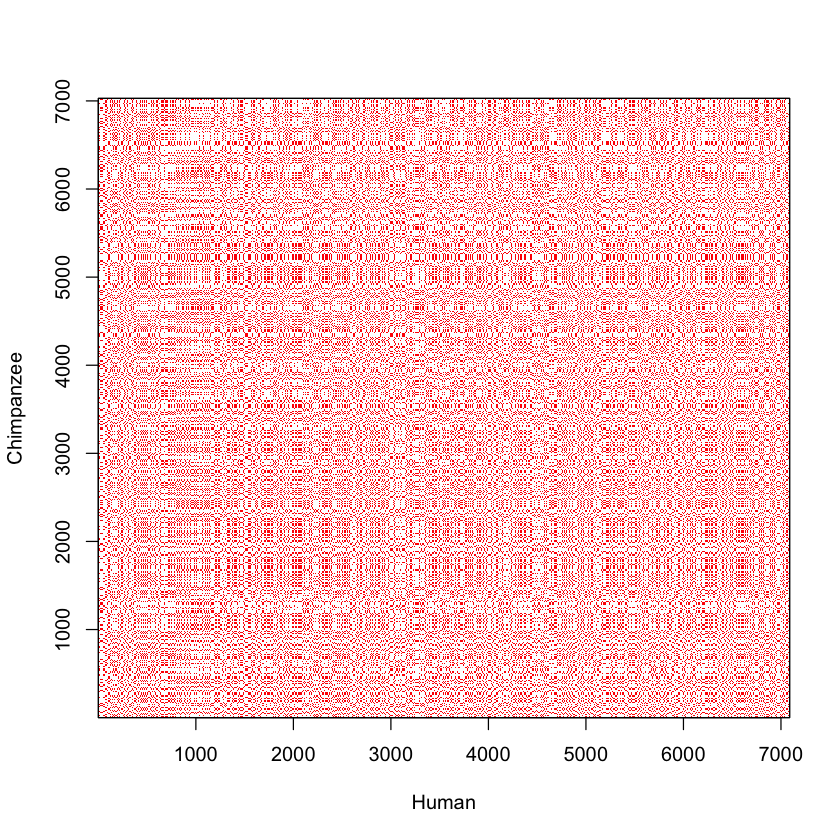

In [51]:
library(seqinr)
myseq <- read.fasta(file = "sequence.fasta")
dotPlot(myseq[[1]], myseq[[2]], col=c("white", "red"), xlab="Human", 
ylab="Chimpanzee")

> -  二维坐标轴表示两个正进行比对的序列，横坐标是序列1，纵坐标是序列2。网格中的每个点对应序列中每个核酸或者蛋白质。而对角线表示在序列中匹配的一些片段。如果斜线是沿着对角线的，并且是完全的，那么它描述了序列的完全相似性。

> - 尝试计算这些序列之间的比对的整齐和相似性来证实之前的命令是对的。
对结果进行*排列测试*，这是基于对观察数据的随机抽样(在我们的例子中是模板序列)来确定小概率事件。要执行测试，只需加载R代码文件sequencePermutatioTest

In [54]:
source("sequencePermutatioTest.R")  # r cookbook home page #
pvalue <- permutes.seq(seq1=sequence1, seq2=sequence2, n=100)

Warning message in file(filename, "r", encoding = encoding):
“无法打开文件'sequencePermutatioTest.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): 无法打开链结


---

## *5 Multiple sequence alignment 多序列对比*

> 系统发育分析

- 准备：muscle包， 需要比对的序列

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("muscle")
library(muscle)

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'muscle'

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  无法打开URL'https://cran.r-project.org/src/contrib/PACKAGES'”
Warning message:
“unable to access index for repository https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6:
  无法打开URL'https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6/PACKAGES'”


- 让所有的序列对齐。它们可以直接从FASTA文件中读取。并查看读取序列

In [62]:
library(muscle)
?muscle

In [73]:
myseq <- readAAStringSet("Macintosh HD/Users/luxuanyi/fastaMSA.fasta.")
myseq  #师姐的方法
myMSA <- muscle(myseq, out=NULL, quiet = FALSE)
myMSA 

ERROR: Error in .Call2("new_input_filexp", filepath, PACKAGE = "XVector"): cannot open file 'Macintosh HD/Users/luxuanyi/fastaMSA.fasta.'


In [72]:
mySeq <- muscle::read.fasta("fastaMSA.fasta")
mySeq  #暂时搜不到解答


ERROR: Error: 'read.fasta' is not an exported object from 'namespace:muscle'


- 现在需要从存储库中获取序列并将它们写入FASTA文件中

- 使用muscle函数执行一下命令对齐

In [ ]:
MyMSA <- muscle(mySeq, out = NULL, quiet = FALSE)

- 保存

In [ ]:
muscle::write.fasta(MyMSA, file="aln.fasta")

- 显示

In [ ]:
print(MyMSA, from = 1, to = aln$length)

- 读取一个对齐文件myMSA(eg)  进入一个R会话使用阅读。校准功能从seqinr包如下。这些文件可以是从基于web或其他独立的MSA对齐工具(如ClustalW)获得

In [ ]:
 virusaln <- read.alignment(file = "myMSA.phy", format = "phylip")

- 这可以使用Biostrings包的其他对齐文件完成readDNAMultipleAlignment功能的晶体文件。的MultipleAlignment类的biostring还提供了处理r中的MSAs的实用程序.另一个叫做ape的包也有MSA的功能。

---

## *6 Phylogenetic analysis and tree plotting     系统发育分析和树图绘制*

- 准备： ape package 、  需要分析的序列（至少知道id)

（1）下载ape包

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))install.packages("BiocManager")
BiocManager::install("ape")

In [1]:
library(ape)

（2）将需要分析的序列id号 定义为一个数据集

In [ ]:
 myset <- c("U15717", "U15718", "U15719", "U15720", "U15721", "U15722", "U15723", "U15724")
 myset

（3）在genbank中获取刚刚定义的数据集的具体内容

In [2]:
 myseqs <- read.GenBank(myset)

ERROR: Error in read.GenBank(myset): 找不到对象'myset'


(4)用 dist.dna 函数计算序列的距离矩阵

In [5]:
mydist <- dist.dna(myseqs)
mydist #返回结果如下，jupyter联网又抽风了

ERROR: Error in dist.dna(myseqs): 找不到对象'myseqs'


In [4]:

             U15717       U15718       U15719       U15720       U15721       U15722       U15723
U15718 0.0963968720                                                                              
U15719 0.0519601191 0.0821667377                                                                 
U15720 0.0155113115 0.0932071967 0.0489261666                                                    
U15721 0.0624466459 0.0797534702 0.0498979851 0.0551246867                                       
U15722 0.0164965334 0.0920721224 0.0478790458 0.0009578547 0.0540676038                          
U15723 0.0699980300 0.0885445872 0.0647927035 0.0636627810 0.0396102719 0.0625875118             
U15724 0.0722326361 0.0842641651 0.0562718695 0.0615634135 0.0397830924 0.0604916017 0.0417080298

ERROR: Error in parse(text = x, srcfile = src): <text>:2:27: unexpected symbol
1: 
2:              U15717       U15718
                             ^


（5）要获取系统发育树的phylo对象，请使用以下triangMtd
使用三角形方法重建树的函数:

In [7]:
myphylo <- triangMtd(mydist)
myphylo #返回情况如下


ERROR: Error in triangMtd(mydist): 找不到对象'mydist'


In [ ]:
Phylogenetic tree with 8 tips and 6 internal nodes.

Tip labels:
	U15717, U15718, U15719, U15720, U15721, U15722, ...

Unrooted; includes branch lengths.

> 如果需要，我们可以使用boot.phylo对phylo对象进行引导。

(6)创建不同种类的系统发育树

In [10]:
plot(myphylo, type="phylogram", edge.color="red", cex=1, edge.width=1,main="(A) Phylogram")

ERROR: Error in plot(myphylo, type = "phylogram", edge.color = "red", cex = 1, : 找不到对象'myphylo'


> 在r gui中这节代码可以成功运行！ 

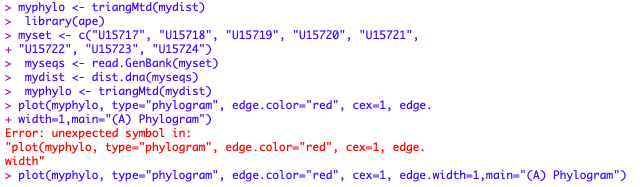

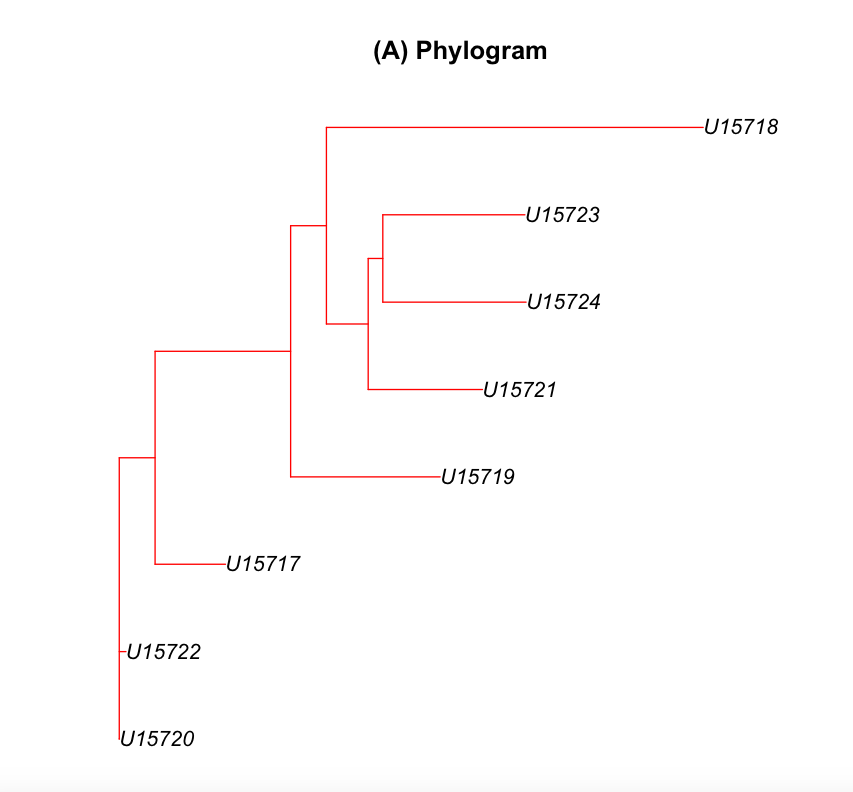

In [11]:
plot(myphylo, type="cladogram", edge.color="red", cex=1, edge.width=1, main="(B) Cladogram")

ERROR: Error in plot(myphylo, type = "cladogram", edge.color = "red", cex = 1, : 找不到对象'myphylo'


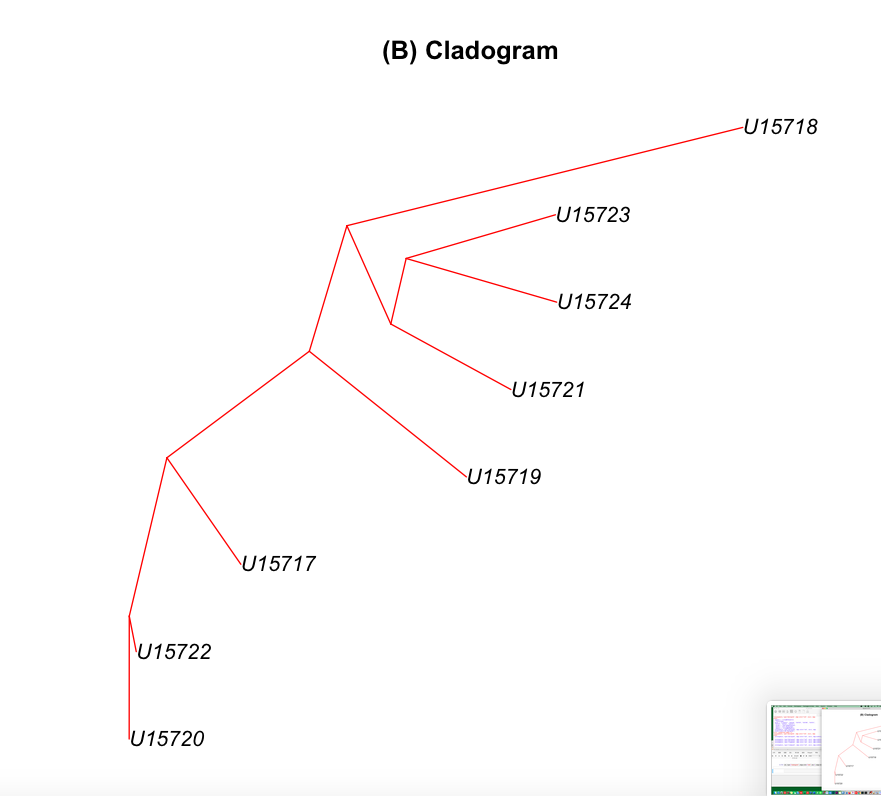

In [12]:
 plot(myphylo, type="fan", edge.color="red", cex=1, edge.width=1, main="(C) Fan")

ERROR: Error in plot(myphylo, type = "fan", edge.color = "red", cex = 1, edge.width = 1, : 找不到对象'myphylo'


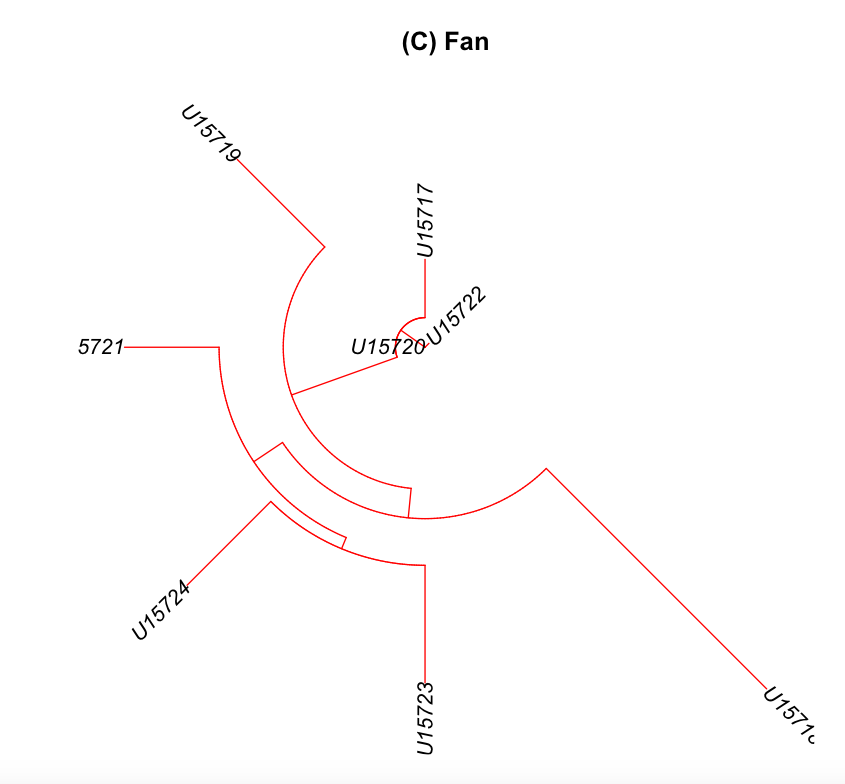

In [13]:
plot(myphylo, type="unrooted", edge.color="red", cex=1, edge.width=1, main="(D) Unrooted")

ERROR: Error in plot(myphylo, type = "unrooted", edge.color = "red", cex = 1, : 找不到对象'myphylo'


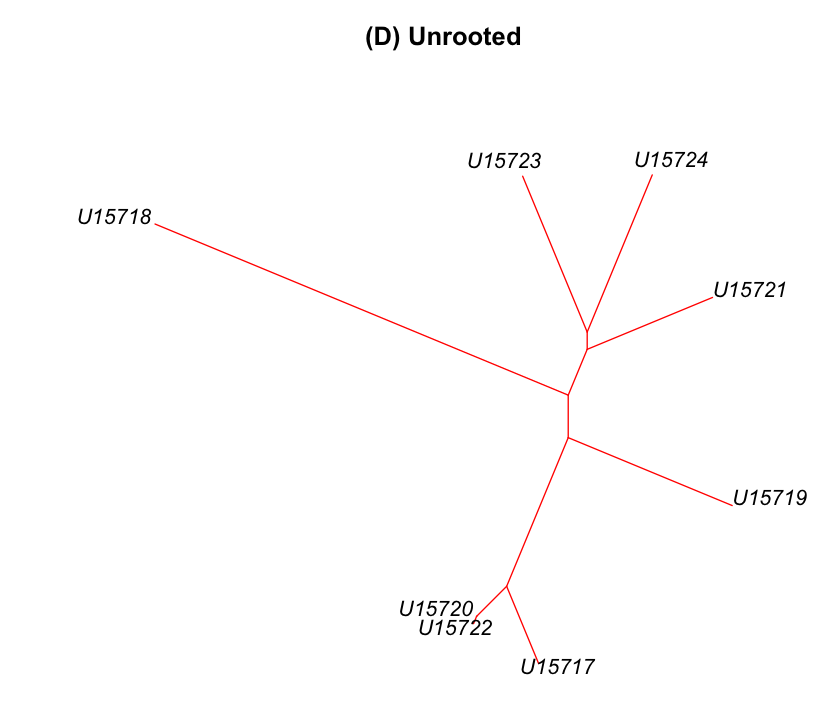

> 一旦序列被系统从数据库中获取，处理过程为系统发育分析开始。第一步是计算它们之间的两两距离序列。这是基于DNA进化的不同模型，例如木村模型，Jukes Cantor模型，等等。距离是根据速度而定的在进化过程中，核苷酸取代了另一个。返回的值是dist类的一个对象(设置为矩阵的形式得到结果)。然后，dist对象被转换成一个phylo对象，用于绘图
系统发育树。

> 这些距离实际上描述了物种之间的距离，或者更确切地说，在进化尺度上的序列。相邻两个物种连接方法创建系统发生树，它将两个最近的相邻星团连接起来，使得这两个星团与其余星团之间的距离尽可能远，可以绘制出各种类型的系统发育树图，其中每个分支茎的长度表示进化的数量(例如连接的分支点之间发生的核苷酸替换的数量)。我们绘制的第二种类型的树是一个析取图。它并不代表物种之间的实际关系，而是进化过程中的分支和假想祖先的分支。第三种类型的树是一种扇形的树，它有各种各样的分枝。未生根的树说明了叶节点的亲缘关系，完全忽略了祖先。

>在研究近亲物种时,在蛋白质水平，信号将非常小，因为蛋白质的进化速度要慢得多。
因此，建议使用核苷酸序列进行这样的分析。相反, 对于遥远的物种，DNA信号太过复杂，因此蛋白质序列是首选。

---

## *7 Handling BLAST results 处理blast的结果*

- BLAST局部序列对比检索工具:目的是在数据库中寻找序列之间的局部相似性相关的序列.BLAST结果通常是一个HTML页面，但是可以作为一个表格下载，本节讨论如何处理这些表格。

    (1) 下载并加载RFLPtools

In [14]:
library(RFLPtools)

Loading required package: RColorBrewer



（2）在这里使用包中内置的blast结果进行演示。要指定文件，

In [16]:
DIR <- system.file("extdata", package = "RFLPtools")

In [17]:
MyFile <- file.path(DIR, "BLASTexample.txt")

(3) 读取（2）中的文件

In [21]:
 MyBLAST <- read.blast(file = MyFile)
 MyBLAST

query.id,subject.id,identity,alignment.length,mismatches,gap.opens,q.start,q.end,s.start,s.end,evalue,bit.score
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
agrFF002,agrFF002,100.00,544,0,0,1,544,1,544,0.0e+00,944.0
agrFF002,agrFF148,93.42,243,14,2,199,439,671,913,6.0e-102,360.0
agrFF002,agrFF148,100.00,11,0,0,462,472,785,795,6.7e+00,21.1
agrFF002,agrFF176,91.37,255,20,2,187,439,123,377,2.0e-100,354.0
agrFF002,agrFF176,100.00,11,0,0,462,472,250,260,6.7e+00,21.1
agrFF002,agrFF040,91.37,255,20,2,187,439,121,375,2.0e-100,354.0
agrFF002,agrFF040,100.00,11,0,0,462,472,248,258,6.7e+00,21.1
agrFF002,agrFF192,91.41,256,18,3,187,439,121,375,9.0e-100,352.0
agrFF002,agrFF192,100.00,11,0,0,462,472,248,258,6.7e+00,21.1


- 如果BLAST结果来自独立的BLAST，那么使用RFLP库的read.blast函数，如下所示，将MyblastRes.txt的blast文件读入数据框:

In [22]:
MyBLAST1 <- read.blast(file="MyblastRes.txt")
MyBLAST1

Warning message in file(file, "rt"):
“无法打开文件'MyblastRes.txt': No such file or directory”


ERROR: Error in file(file, "rt"): 无法打开链结


- 如果您没有使用BLAST程序，而是使用基于web的工具来获取txt文件，仍然可以通过以下命令将该文件读取：

In [24]:
MyBLAST2 <- read.csv(file="myAlign.txt", head=TRUE, sep=",")

Warning message in file(file, "rt"):
“无法打开文件'myAlign.txt': No such file or directory”


ERROR: Error in file(file, "rt"): 无法打开链结


（4）查看读取的数据内容

In [27]:
head( MyBLAST)

,query.id,subject.id,identity,alignment.length,mismatches,gap.opens,q.start,q.end,s.start,s.end,evalue,bit.score
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,agrFF002,agrFF002,100.00,544,0,0,1,544,1,544,0.0e+00,944.0
2,agrFF002,agrFF148,93.42,243,14,2,199,439,671,913,6.0e-102,360.0
3,agrFF002,agrFF148,100.00,11,0,0,462,472,785,795,6.7e+00,21.1
4,agrFF002,agrFF176,91.37,255,20,2,187,439,123,377,2.0e-100,354.0
5,agrFF002,agrFF176,100.00,11,0,0,462,472,250,260,6.7e+00,21.1
6,agrFF002,agrFF040,91.37,255,20,2,187,439,121,375,2.0e-100,354.0


（5）RFLPtool包还允许计算/提取类似的矩阵.然后，您可以根据自己的方便来命名数据的列并将其用于进一步分析

In [29]:
mySimMat <- simMatrix(MyBLAST)
mySimMat

,agrFF002,agrFF003,agrFF005,agrFF023,agrFF036,agrFF040,agrFF042,agrFF043,agrFF044,agrFF049,⋯,agrFF185,agrFF190,agrFF191,agrFF192,agrFF200,agrFF202,agrFF203,agrFF204,agrFF206,agrFF212
agrFF002,1.0000000,0.5142857,0.3645418,0.6389497,0.6409692,0.5065217,0.5154867,0.4458078,0.5125348,0.3995680,⋯,0.5087336,0.3682093,0.6198704,0.5200000,0.3549696,0.3809524,0.3825364,0.2904412,0.4478528,0.3731343
agrFF003,0.5142857,1.0000000,0.3846154,0.9912088,0.9801762,0.9736264,0.9800885,0.7274725,0.6935933,0.4351648,⋯,0.9846154,0.3846154,0.9780220,0.9866667,0.3956044,0.4329670,0.4329670,0.3252747,0.7076923,0.4175824
agrFF005,0.3645418,0.3846154,1.0000000,0.3829322,0.3876652,0.3804348,0.3871681,0.3680982,0.5041783,0.7386609,⋯,0.3820961,0.9979879,0.3779698,0.3888889,0.4036511,0.7039337,0.7068607,0.2988048,0.3701431,0.4243070
agrFF023,0.6389497,0.9912088,0.3829322,1.0000000,0.9911894,0.9759300,0.9889381,0.7264770,0.8495822,0.4332604,⋯,0.9868709,0.3829322,0.9737418,0.9977778,0.3938731,0.4310722,0.4310722,0.3238512,0.7067834,0.4157549
agrFF036,0.6409692,0.9801762,0.3876652,0.9911894,1.0000000,0.9691630,0.9845133,0.7290749,0.8467967,0.4339207,⋯,0.9801762,0.3876652,0.9669604,0.9888889,0.3986784,0.4317181,0.4317181,0.3259912,0.7092511,0.4207048
agrFF040,0.5065217,0.9736264,0.3804348,0.9759300,0.9691630,1.0000000,0.9823009,0.7195652,0.8551532,0.4282609,⋯,0.9825328,0.3804348,0.9695652,0.9800000,0.3782609,0.4260870,0.4260870,0.3217391,0.7000000,0.4108696
agrFF042,0.5154867,0.9800885,0.3871681,0.9889381,0.9845133,0.9823009,1.0000000,0.7345133,0.8189415,0.4358407,⋯,0.9933628,0.3871681,0.9734513,0.9777778,0.4004425,0.4336283,0.4336283,0.3274336,0.7146018,0.4225664
agrFF043,0.4458078,0.7274725,0.3680982,0.7264770,0.7290749,0.7195652,0.7345133,1.0000000,0.9916435,0.4125270,⋯,0.7314410,0.3680982,0.7257019,0.7222222,0.3865031,0.3933747,0.3950104,0.2985685,0.9897751,0.3901919
agrFF044,0.5125348,0.6935933,0.5041783,0.8495822,0.8467967,0.8551532,0.8189415,0.9916435,1.0000000,0.5348189,⋯,0.8579387,0.5041783,0.8189415,0.8440111,0.5292479,0.5320334,0.5320334,0.4094708,0.9944290,0.5125348
agrFF049,0.3995680,0.4351648,0.7386609,0.4332604,0.4339207,0.4282609,0.4358407,0.4125270,0.5348189,1.0000000,⋯,0.4323144,0.7386609,0.4254860,0.4400000,0.5291577,0.9913607,0.9913607,0.3434125,0.4146868,0.5313175


> 有些数据可以通过以下形式加载，这让我们对BLAST结果数据的内容有了一个概念。数据由各种各样的元素，如名称、标识、序列长度、对齐长度、e -值等blast搜索的其他属性。

In [30]:
data(BLASTdata)
head(BLASTdata)

,query.id,subject.id,identity,alignment.length,mismatches,gap.opens,q.start,q.end,s.start,s.end,evalue,bit.score
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,agrFF002,agrFF002,100.00,544,0,0,1,544,1,544,0.0e+00,944.0
2,agrFF002,agrFF148,93.42,243,14,2,199,439,671,913,6.0e-102,360.0
3,agrFF002,agrFF148,100.00,11,0,0,462,472,785,795,6.7e+00,21.1
4,agrFF002,agrFF176,91.37,255,20,2,187,439,123,377,2.0e-100,354.0
5,agrFF002,agrFF176,100.00,11,0,0,462,472,250,260,6.7e+00,21.1
6,agrFF002,agrFF040,91.37,255,20,2,187,439,121,375,2.0e-100,354.0


>尝试查看包数据的列名

In [31]:
 colnames(BLASTdata)

[1] "query.id"         "subject.id"       "identity"         "alignment.length"
 [5] "mismatches"       "gap.opens"        "q.start"          "q.end"           
 [9] "s.start"          "s.end"            "evalue"           "bit.score"

---

## *8 Pattern finding in a sequence 在序列中查找常见的序列模型*

- 检查基因中的一些模式同样重要它可用于检测核苷酸或蛋白质序列中各种有趣的字符子集，例如起始密码子以及核酸中的终止密码子。启动和停止密码子标记翻译的位置转化为蛋白质序列的起始点和终止点。 在mRNA中，常见的启示密码子式AUG,终止密码子是：UAG,UGA,UAA.  在蛋白质序列已知的的情况下，我们也可以知道一些常见的序列。本节讨论在功能和分子生物学角度中找到一些序列模型，例如如何找到开放阅读框ORF。

（1）在R中查找启动密码子和停止密码子可以看作是一个简单的模式匹配问题，可以使用Biostrings库来解决。加载Biostring包

In [32]:
library(Biostrings)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The

（2）按照以下方式创建要分析的序列(在我们的示例中，我们使用了一个random
序列，但我们也可以使用从GenBank获取的序列):

In [34]:
mynucleotide <- DNAString("aacataatgcagtagaacccatgagccc")
mynucleotide

  28-letter "DNAString" instance
seq: AACATAATGCAGTAGAACCCATGAGCCC

（3）开始来找寻一些固定模式的序列，如启示密码子、终止密码子之类的。

In [38]:
 matchPattern(DNAString("ATG"), mynucleotide) #起始密码子ATG

  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]     7   9     3 [ATG]
[2]    21  23     3 [ATG]

In [39]:
 matchPattern("TAA", mynucleotide) #终止密码子

  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]     5   7     3 [TAA]

（4）现在，将这两个方面合并到一个函数中，以返回总的结果所有密码子如下函数所示:

In [40]:
myCodonFinder <- function(sequence){
startCodon = DNAString("ATG")                # 指定起始密码子
 stopCodons = list("TAA", "TAG", "TGA")   # 指定终止密码子
 codonPosition = list()                            #初始化返回的结果作为一个列表
 codonPosition$Start = matchPattern(startCodon, sequence) # 搜索起始密码子
 x=list()
for(i in 1:3){                                            # 重复所有的终止密码子
x[[i]]= matchPattern(DNAString (stopCodons[[i]]), sequence)
codonPosition$Stop=x
 }
return(codonPosition)                              #输出结果
}

（5）将之前的代码带进去

In [41]:
 StartStops <- myCodonFinder(mynucleotide)

In [43]:
 StartStops

$Start
  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]     7   9     3 [ATG]
[2]    21  23     3 [ATG]

$Stop
$Stop[[1]]
  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]     5   7     3 [TAA]

$Stop[[2]]
  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]    13  15     3 [TAG]

$Stop[[3]]
  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]    22  24     3 [TGA]



>biostring的matchPattern函数是用来识别在一个序列中出现一个特定的图案或主题。它需要一个字符串作为输入由DNAString函数创建的(不是字符向量)。如果你打算使用从检索序列配方的字符向量中，必须将其转换为通过使用c2s和DNAString函数(AAString for a protein sequence)和rna的RNAString)。matchPattern函数返回一个包含列的表表示命中或匹配的开始、结束和宽度(宽度显然与模式的长度)。在序列中找到的所有命中都排列在
返回的对象。

>在我们的函数中，为了找到所有的开始密码子和结束密码子，我们结合了两个模式搜索;1.首先,我们起始密码子的搜索结合起来，然后迭代地查找这三个密码子停止密码子。
我们可以修改这个函数来找到一个ORF。

- 关于序列中的模式的问题。另一个类似的例子是matchLRPatterns
在一个序列中找到成对匹配项的函数。它的使用方法如下：

In [44]:
mytarget <- DNAString("AAATTAACCCTT")
matchLRPatterns("AA", "TT", 5, mytarget)

  Views on a 12-letter DNAString subject
subject: AAATTAACCCTT
views:
    start end width
[1]     1   5     5 [AAATT]
[2]     2   5     4 [AATT]
[3]     6  12     7 [AACCCTT]

----